<a href="https://colab.research.google.com/github/Aravindlakki/STML-LAB/blob/main/STML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
path = "/content/drive/MyDrive/digital_wallet_transactions.csv"
data = pd.read_csv(path)


SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
data['transaction_status'] = data['transaction_status'].apply(lambda x: 1 if x == 'Successful' else 0)
X = data[['product_amount', 'transaction_fee', 'cashback', 'loyalty_points',
          'payment_method', 'device_type', 'location']]
y = data['transaction_status']
X = pd.get_dummies(X, columns=['payment_method', 'device_type', 'location'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)
train_score, test_score


(0.9488571428571428, 0.956)

KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
features = ['product_amount', 'transaction_fee', 'cashback', 'loyalty_points',
            'payment_method', 'device_type', 'location']
X = data[features]
y = data['transaction_status']
X_encoded = X.copy()
label_encoders = {}
for col in ['payment_method', 'device_type', 'location']:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
y_encoded = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

accuracy, classification_report_output


(0.955,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        42\n           1       0.96      1.00      0.98       958\n\n    accuracy                           0.95      1000\n   macro avg       0.48      0.50      0.49      1000\nweighted avg       0.92      0.95      0.94      1000\n')

In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/digital_wallet_transactions.csv'
data = pd.read_csv(data_path)
data.head(), data.columns


(   idx                        transaction_id     user_id  transaction_date  \
 0    1  4dac3ea3-6492-46ec-80b8-dc45c3ad0b14  USER_05159  2023-08-19 03:32   
 1    2  a903ed9f-eb84-47e7-b8aa-fd1786c919cf  USER_07204  2023-08-19 04:37   
 2    3  2a393013-733c-4add-9f09-bed1eeb33676  USER_00903  2023-08-19 05:52   
 3    4  9a07ad19-4673-4794-9cd2-9b139f39c715  USER_01769  2023-08-19 06:35   
 4    5  76418260-c985-4011-979d-0914604d0d68  USER_03544  2023-08-19 06:36   
 
   product_category               product_name     merchant_name  \
 0     Rent Payment          2BHK Flat Deposit            Airbnb   
 1         Gas Bill  Commercial Gas Connection         Adani Gas   
 2       Bus Ticket               Semi-Sleeper    MakeMyTrip Bus   
 3    Internet Bill          4G Unlimited Plan  Airtel Broadband   
 4   Loan Repayment              Home Loan EMI         Axis Bank   
 
    product_amount  transaction_fee  cashback  loyalty_points payment_method  \
 0         1525.39            36.6

Decision Tree

Accuracy: 0.957

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.04      0.07        26
           1       0.33      0.06      0.11        16
           2       0.96      1.00      0.98       958

    accuracy                           0.96      1000
   macro avg       0.54      0.37      0.38      1000
weighted avg       0.93      0.96      0.94      1000



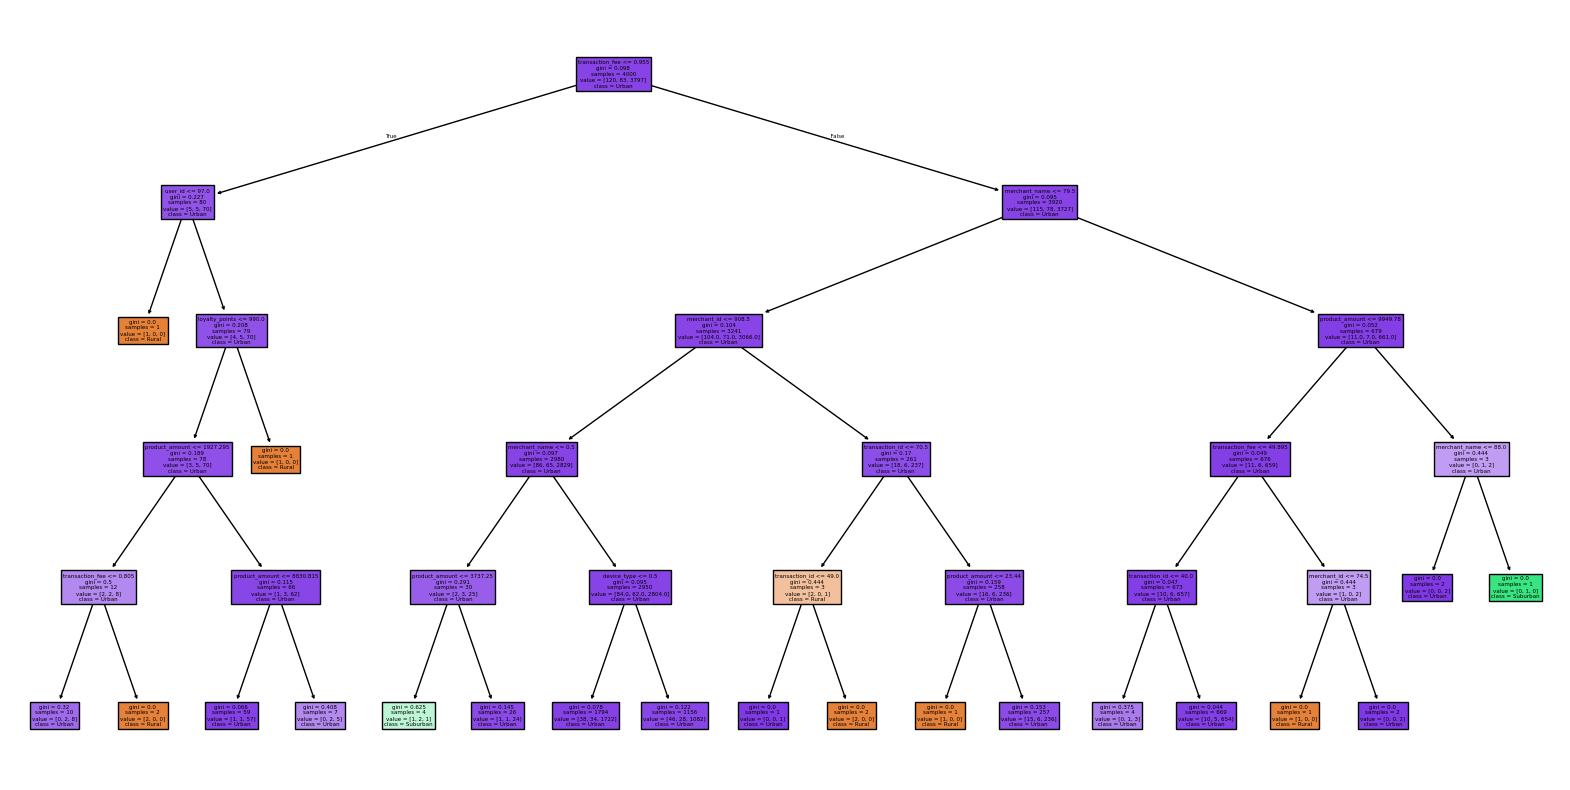


Feature Importance:
             feature  importance
7     product_amount    0.288415
8    transaction_fee    0.173176
1     transaction_id    0.164420
6      merchant_name    0.111154
12       merchant_id    0.090620
10    loyalty_points    0.072886
2            user_id    0.071064
13       device_type    0.028263
0                idx    0.000000
3   transaction_date    0.000000
4   product_category    0.000000
5       product_name    0.000000
9           cashback    0.000000
11    payment_method    0.000000
14          location    0.000000


['decision_tree_model.joblib']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

df = pd.read_csv('/content/drive/MyDrive/digital_wallet_transactions.csv')

df = df.dropna()

le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(['transaction_status'], axis=1)  # Features
y = df['transaction_status']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


import joblib
joblib.dump(dt_model, 'decision_tree_model.joblib')

RANDOM FOREST,Confusion matrix

Dataset Shape: (5000, 16)

Missing Values:
 idx                   0
transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
dtype: int64

Data Types:
 idx                     int64
transaction_id         object
user_id                object
transaction_date       object
product_category       object
product_name           object
merchant_name          object
product_amount        float64
transaction_fee       float64
cashback              float64
loyalty_points          int64
payment_method         object
transaction_status     object
merchant_id            object
device_type            object
location               object
dtype: object

Training basic Random Forest model...

Basic Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}

Tuned Model Accuracy: 0.9580

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        16
           2       0.96      1.00      0.98       958

    accuracy                           0.96      1000
   macro avg       0.32      0.33      0.33      1000
weighted avg       0.92      0.96      0.94      1000


Generating visualizations...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


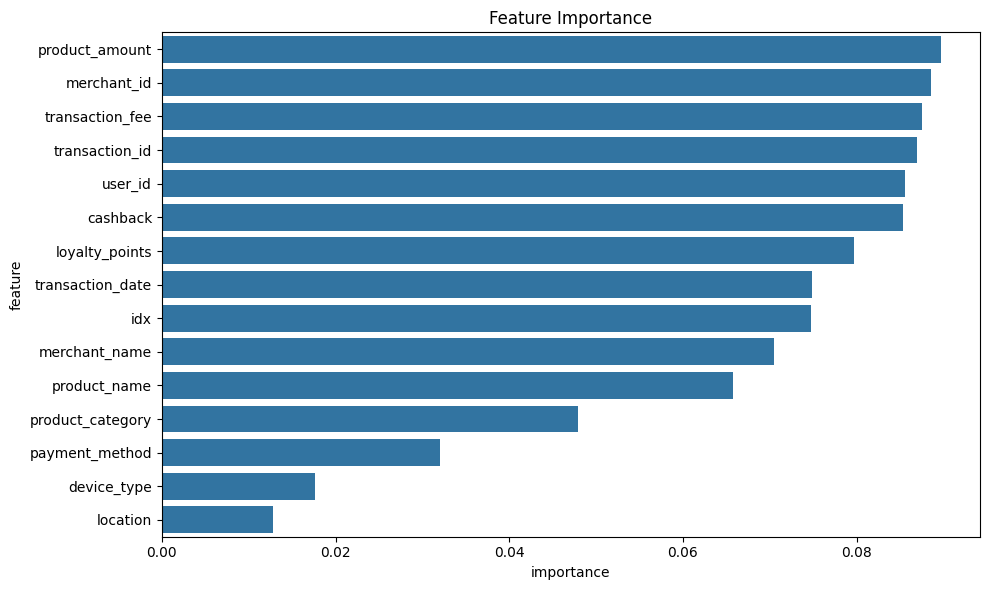

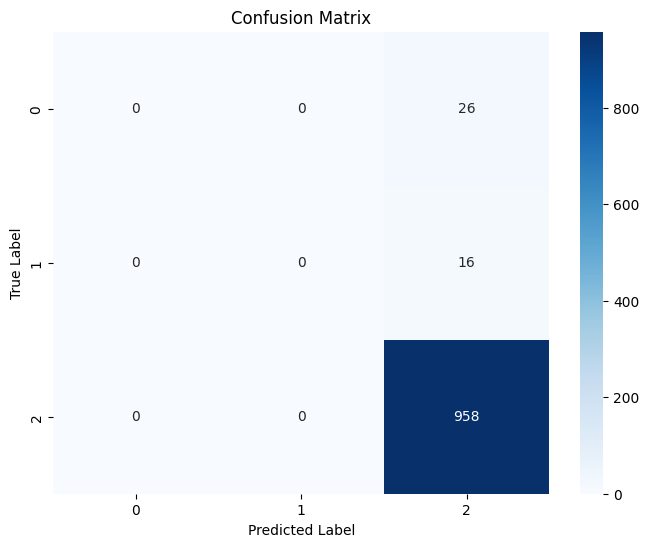


Model saved as 'random_forest_model.joblib'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_data():
    try:
        df = pd.read_csv('/content/drive/MyDrive/digital_wallet_transactions.csv')
        print("Dataset Shape:", df.shape)
        print("\nMissing Values:\n", df.isnull().sum())
        print("\nData Types:\n", df.dtypes)
        df = df.dropna()
        le = LabelEncoder()
        categorical_columns = df.select_dtypes(include=['object']).columns
        for column in categorical_columns:
            df[column] = le.fit_transform(df[column])

        return df

    except FileNotFoundError:
        print("Error: File not found!")
        return None
def train_random_forest(X_train, X_test, y_train, y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return rf_model, y_pred, accuracy
def hyperparameter_tuning(X_train, y_train):

    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [10, 20, 30, 40, 50, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }

    rf = RandomForestClassifier()
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                 n_iter=100, cv=3, random_state=42, n_jobs=-1)
    rf_random.fit(X_train, y_train)

    print("Best parameters:", rf_random.best_params_)
    return rf_random.best_estimator_

def plot_feature_importance(model, X):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

    return feature_importance

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


def main():
    # 1. Load and preprocess data
    df = load_and_preprocess_data()
    if df is None:
        return
    X = df.drop(['transaction_status'], axis=1)
    y = df['transaction_status']

    # 3. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Train basic model
    print("\nTraining basic Random Forest model...")
    rf_model, y_pred, accuracy = train_random_forest(X_train, X_test, y_train, y_test)

    print(f"\nBasic Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 5. Hyperparameter tuning
    print("\nPerforming hyperparameter tuning...")
    best_model = hyperparameter_tuning(X_train, y_train)

    # 6. Evaluate best model
    y_pred_best = best_model.predict(X_test)
    print(f"\nTuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
    print("\nTuned Model Classification Report:")
    print(classification_report(y_test, y_pred_best))

    # 7. Visualizations
    print("\nGenerating visualizations...")
    feature_importance = plot_feature_importance(best_model, X)
    plot_confusion_matrix(y_test, y_pred_best)

    # 8. Save the model
    import joblib
    joblib.dump(best_model, 'random_forest_model.joblib')
    print("\nModel saved as 'random_forest_model.joblib'")

    return best_model, feature_importance

def make_prediction(model, input_data):
    """
    Make predictions on new data
    """
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)
    return prediction, probability

def model_evaluation_metrics(y_true, y_pred):
    """
    Calculate detailed evaluation metrics
    """
    from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
    }

    return metrics
if __name__ == "__main__":
    best_model, feature_importance = main()

Recall and F1 score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, f1_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/digital_wallet_transactions.csv')

X = data.drop(columns=['transaction_status'])
y = data['transaction_status']

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Recall:", recall)
print("F1 Score:", f1)

Recall: 0.956
F1 Score: 0.9344948875255624


In [20]:
import numpy as np

# Sample data
actual = np.array([3, -0.5, 2, 7])
predicted = np.array([2.5, 0.0, 2, 8])

# RMSE Calculation
rmse = np.sqrt(np.mean((actual - predicted) ** 2))
print("RMSE:", rmse)

# MAE Calculation
mae = np.mean(np.abs(actual - predicted))
print("MAE:", mae)

RMSE: 0.6123724356957945
MAE: 0.5


In [21]:
import statsmodels.api as sm

# Sample data
X = sm.add_constant(np.array([[1], [2], [3], [4]]))  # Adding constant for intercept
y = np.array([1, 2, 3, 4])

# Fit model
model = sm.OLS(y, X).fit()

# Predictions with confidence intervals
predictions = model.get_prediction(X)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

print(summary_frame[['mean', 'mean_ci_lower', 'mean_ci_upper']])

   mean  mean_ci_lower  mean_ci_upper
0   1.0            1.0            1.0
1   2.0            2.0            2.0
2   3.0            3.0            3.0
3   4.0            4.0            4.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than t

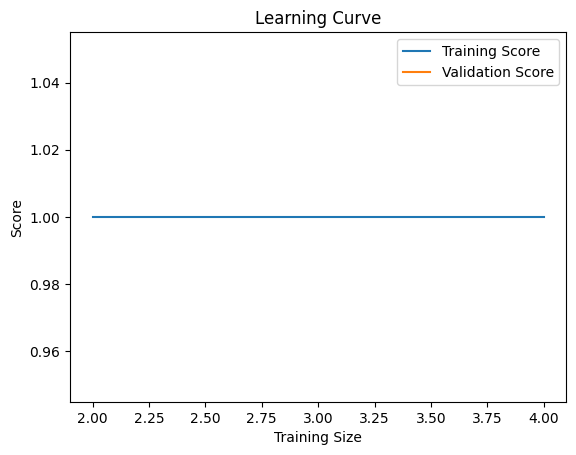

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Sample data
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([1, 2, 3, 4, 5])

# Learning curve data
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X_train, y_train, cv=5)

# Plotting
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()